In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import scipy.sparse
import random
import tensorflow as tf

In [ ]:
''' load dataset from sklearn '''
from sklearn.datasets import fetch_rcv1
rcv1 = fetch_rcv1(shuffle=True)# change arrangment of sample randomly 

In [ ]:
N_SAMPLES = 10000 
from sklearn.utils import resample
X1, y1 = resample(rcv1.data, rcv1.target, replace=False,
                n_samples=N_SAMPLES, random_state=1234)
X1 = X1.toarray()
y1 = y1.toarray()

In [ ]:
print(type(rcv1.data))
print(X1.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(10000, 47236)


In [ ]:
!pip3 install susi

# **SUSI SOM**

In [ ]:
import susi

# initialize and fit SOM
som = susi.SOMClustering(n_rows=30,n_columns=30,n_iter_unsupervised =1000,
                         learning_rate_start=0.7,nbh_dist_weight_mode ="pseudo-gaussian")
                         
som.fit(X1)

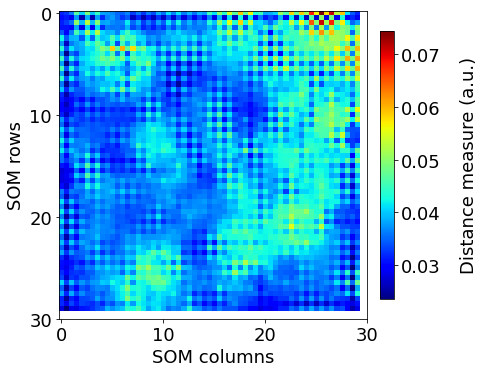

In [ ]:
u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, 30, 30, cmap="jet")
plt.show()

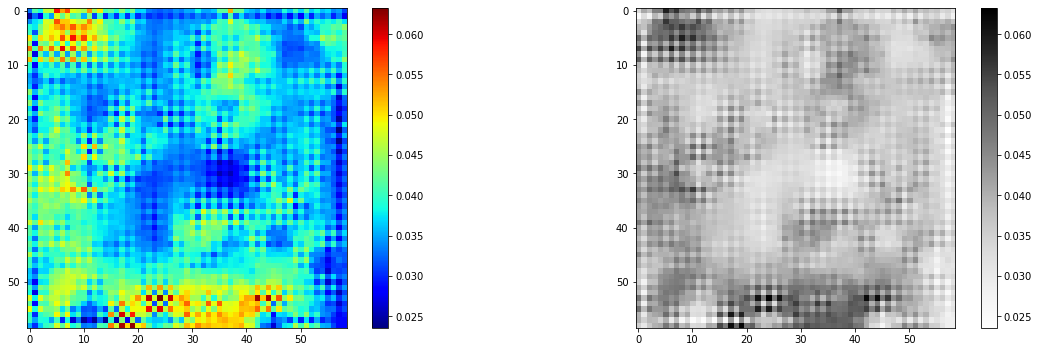

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
plt.imshow(np.squeeze(u_matrix), cmap="jet")
plt.colorbar()

plt.subplot(3,2,2)
plt.imshow(np.squeeze(u_matrix), cmap="Greys")
plt.colorbar()
plt.show()

### **U-Matrix**

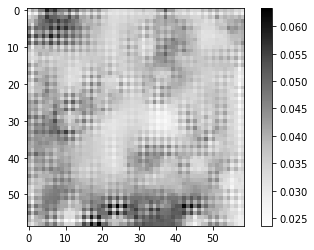

In [ ]:
u_matrix = som.get_u_matrix()
plt.imshow(np.squeeze(u_matrix), cmap="Greys")
plt.colorbar()
plt.show()

#### Plot neighborhood distance weight matrix in 3D.

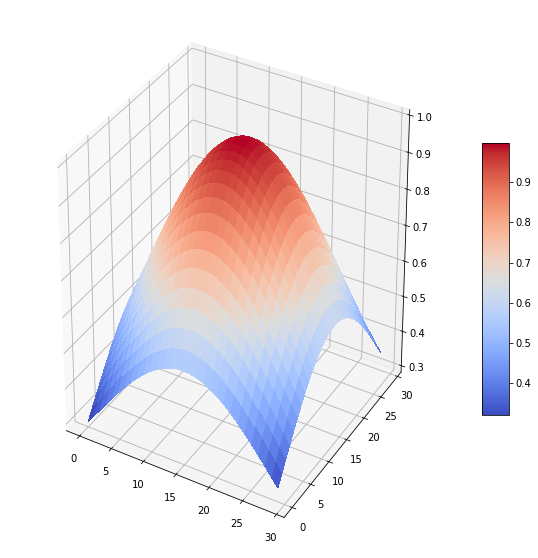

In [ ]:
from susi.SOMPlots import plot_estimation_map,plot_nbh_dist_weight_matrix,plot_som_histogram,plot_umatrix
plot_nbh_dist_weight_matrix(som)
plt.show()

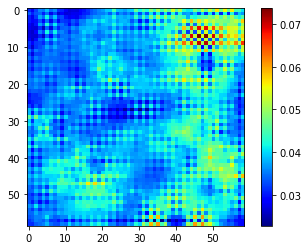

SOM fitted!


In [ ]:
import susi

# initialize and fit SOM
som = susi.SOMClustering(n_rows=30,n_columns=30,n_iter_unsupervised =1000,
                         learning_rate_start=0.7,nbh_dist_weight_mode ="pseudo-gaussian")
                         
som.fit(X1)

u_matrix = som.get_u_matrix()
plt.imshow(np.squeeze(u_matrix), cmap="jet")
plt.colorbar()
plt.show()
print("SOM fitted!")

# **Plot clusters**

In [ ]:
clusters = som.get_clusters(X1)

In [ ]:
with open('X130.pickle', 'wb') as f:
    pickle.dump(X1, f)

with open('y130.pickle', 'wb') as f:
    pickle.dump(y1, f)

In [ ]:
import pickle

with open('som30.pickle', 'wb') as f:
    pickle.dump(som, f)

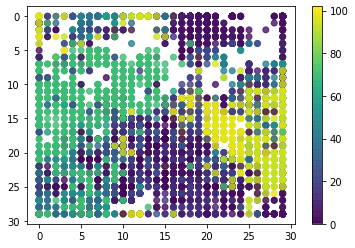

In [ ]:
plt.scatter(x=[c[1] for c in clusters], y=[c[0] for c in clusters], c=np.argmax(y1, axis=1), alpha=0.8)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()